# Save & Load Variables 
많은 데이터를 Training 하는 것은 시간이 소요되는 일이다. 때문에 이미 훈련된 모델을 즉각적으로 서비스하거나 기존에 훈련하던 데이터를 이어서 훈련하기 위해서는 Model 를 저장하고 복구하는 작업을 할 필요가 있다. 본 Chapter 에서는 tensorflow.train.Saver() 을 이용하여 Model 을 저장하고 복구하는 방법을 이야기하고자 한다. 


<H3>(1) Save Model </H3>    
모델을 저장하는 예제를 작성하기 위하여 간단한 Linear Regression 을 예로 사용하였다. 전체적인 Sample Code 는 최초에 Train 시 충분히 훈련이 되지 않을 만큼 낮은 Learning Rate로 조금만 반복 훈련을 하여 Plot 으로 표현시 주어진 데이터가 잘 설명되지 않는 것을 확인하고, 모델을 Restore 하지 않고 계속 Train 을 해서는 모델이 더 이상 나아지지 않는 것을 테스트 한다. Save 에 사용하는 문법은 아래와 같이 간단하다. 

In [2]:
import tensorflow as tf

weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35),
                      name="weights")
biases = tf.Variable(tf.zeros([200]), name="biases")

# Add an op to initialize the variables.
model = tf.global_variables_initializer()

saver = tf.train.Saver()
sess = tf.Session()
sess.run(model)
saver.save(sess, 'my-model', global_step=0)


'my-model-0'

Linear Regression 등에 대한 상세 설명은 선형회귀 분석 파트에서 설명하도록 한다. 

Epoch: 0002 cost= 34.704002380 W= -0.731451 b= -1.07482
Epoch: 0004 cost= 29.002986908 W= -0.625735 b= -1.05948
Epoch: 0006 cost= 24.245620728 W= -0.529171 b= -1.04542
Epoch: 0008 cost= 20.275697708 W= -0.440967 b= -1.03255
Epoch: 0010 cost= 16.962852478 W= -0.360399 b= -1.02075
Epoch: 0012 cost= 14.198325157 W= -0.286808 b= -1.00994
Epoch: 0014 cost= 11.891342163 W= -0.21959 b= -1.00003
Epoch: 0016 cost= 9.966161728 W= -0.158192 b= -0.990939
Epoch: 0018 cost= 8.359583855 W= -0.102112 b= -0.982601
Epoch: 0020 cost= 7.018873692 W= -0.0508887 b= -0.974948
Optimization Finished!
Training cost= 7.01887 W= -0.0508887 b= -0.974948 

Model saved in file: /tmp/chap1_save_restore_model.ckpt


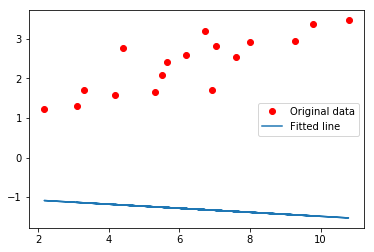

In [4]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

rng = numpy.random

# Parameters
learning_rate = 0.001
training_epochs = 20
display_step = 2

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                        7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                        2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    save_path = saver.save(sess, "/tmp/chap1_save_restore_model.ckpt")
    print("Model saved in file: %s" % save_path)
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

<H3>(2) Restore Model & Continue Train </H3>   
처음에 Train 하던 Model 을 복구하고 이어서 Train 을 진행한다. 처음 Train 을 진행하였을 때보다 훈련된 W, B 값이 주어진 데이터를 더 잘 설명하는 것을 볼 수 있다. 

Model Load finished
Epoch: 0002 cost= 0.709372044 W= 0.148789 b= 0.34084
Epoch: 0004 cost= 0.606749892 W= 0.162956 b= 0.342948
Epoch: 0006 cost= 0.521103442 W= 0.175897 b= 0.344883
Epoch: 0008 cost= 0.449623644 W= 0.187716 b= 0.346659
Epoch: 0010 cost= 0.389966190 W= 0.198512 b= 0.348291
Epoch: 0012 cost= 0.340174317 W= 0.208372 b= 0.349791
Epoch: 0014 cost= 0.298616141 W= 0.217378 b= 0.35117
Epoch: 0016 cost= 0.263928771 W= 0.225604 b= 0.352439
Epoch: 0018 cost= 0.234975681 W= 0.233116 b= 0.353608
Epoch: 0020 cost= 0.210808218 W= 0.239977 b= 0.354684
Optimization Finished!
Training cost= 0.210808 W= 0.239977 b= 0.354684 



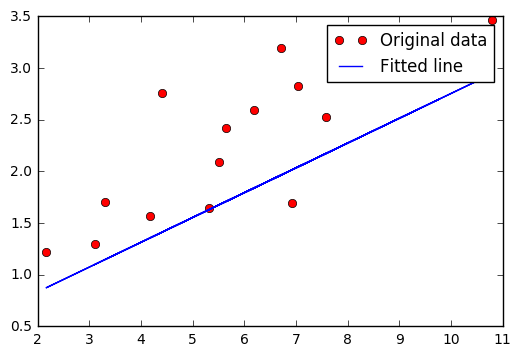

In [30]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, "/tmp/chap1_save_restore_model.ckpt")
    print("Model Load finished")
        
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    save_path = saver.save(sess, "/tmp/chap1_save_restore_model.ckpt")
    print("Model saved in file: %s" % save_path)
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

<H3>(3) Restore Model & Predict Result </H3>   
모델을 Restore 하고 예측하기를 원하는 값을 넣어서 예측을 해보도록 한다. 훈련된 W와 b 값을 읽어서 입력된 X 값과 WX + b 연산을 해주면 우리가 원하는 Y 값을 구할 수 있다. DNN 에서 Feed Forwarding 을 하는 방법은 추후 다루도록 한다. 

In [5]:
import tensorflow as tf
import numpy

def predict_result(input):
    with tf.Session() as sess:
        sess.run(init)
        saver.restore(sess, "/tmp/chap1_save_restore_model.ckpt")
        return sess.run(W) * input + sess.run(b)
    
print("result value : {0}".format(predict_result(10)))
    
    

result value : -1.4838345125317574
